# **LOAN CREDIT RISK SCORING PREDICTION**

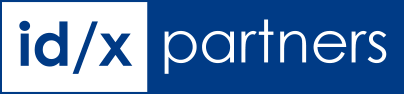

Final Project : Data Scientist Virtual Internship Experience ID/X Partners

**By : Vanessa Novalia**








#**1. Bussiness Understanding :**

Membangun model yang dapat memprediksi credit risk menggunakan dataset yang disediakan oleh company yang terdiri dari status peminjaman yang akan diklasifikasikan menjadi data pinjaman yang bagus dan buruk. Selain itu, mempersiapkan media visual untuk mempresentasikan solusi ke klien.





---


#**2. Analytic Approach :**

- Descriptive Analysis
- Graph Analysis
- Predictive Modeling(Classification)


**Goal :**

Membangun model prediksi risiko kredit yang akurat untuk membantu perusahaan lending company dalam pengambilan keputusan kredit yang lebih baik


**Objectives :**
1. Meningkatkan akurasi prediksi risiko kredit perusahaan
2. Mengurangi risiko kredit yang buruk atau pembayaram yang tidak lancar
3. Meningkatkan efisiensi dalam proses penilaian kredit.
4. Meningkatkan kepuasan pelanggan dengan memberikan keputusan kredit yang lebih adil dan transparan.
5. Mengurangi kerugian akibat penyaluran kredit yang berisiko tinggi.



---



#**3. Data Requirement :**

Dataset of customer loan from financial company

#**4. Data Collection**
Dataset is collected by ID/X Partners from a company

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from wordcloud import WordCloud
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn import ensemble, naive_bayes, gaussian_process
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score

import pickle
from pathlib import Path

In [2]:
# load data train
loan_data = pd.read_csv('/content/drive/MyDrive/Dataset/VIX_IdxPartner/loan_data_2007_2014.csv');

<ipython-input-2-a48cffb649d0>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('/content/drive/MyDrive/Dataset/VIX_IdxPartner/loan_data_2007_2014.csv');


# **5. Data Understanding**

In [3]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print('Data terdiri dari %.f rows and %.f columns' %(loan_data.shape[0], loan_data.shape[1]))

Data terdiri dari 466285 rows and 75 columns


In [5]:
print(loan_data.columns)

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Saya akan menghapus kolom 'Unnamed: 0' karena kolom tersebut berisi urutan peminjaman. Kemudian kolom 'id' dan 'member id' juga tidak dapat digunakan dalam tahap modeling

In [7]:
loan_data.drop(columns=['Unnamed: 0', 'id', 'member_id'], inplace = True)

In [8]:
# Membagi 2 macam tipe data yaitu numeric dan categoric
cat = loan_data.select_dtypes(include = 'object')
cat_col = cat.columns.to_list()
numeric = loan_data.select_dtypes(exclude= 'object')
numeric_col = numeric.columns.to_list()

In [9]:
loan_data[numeric_col].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [10]:
loan_data[cat_col].describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


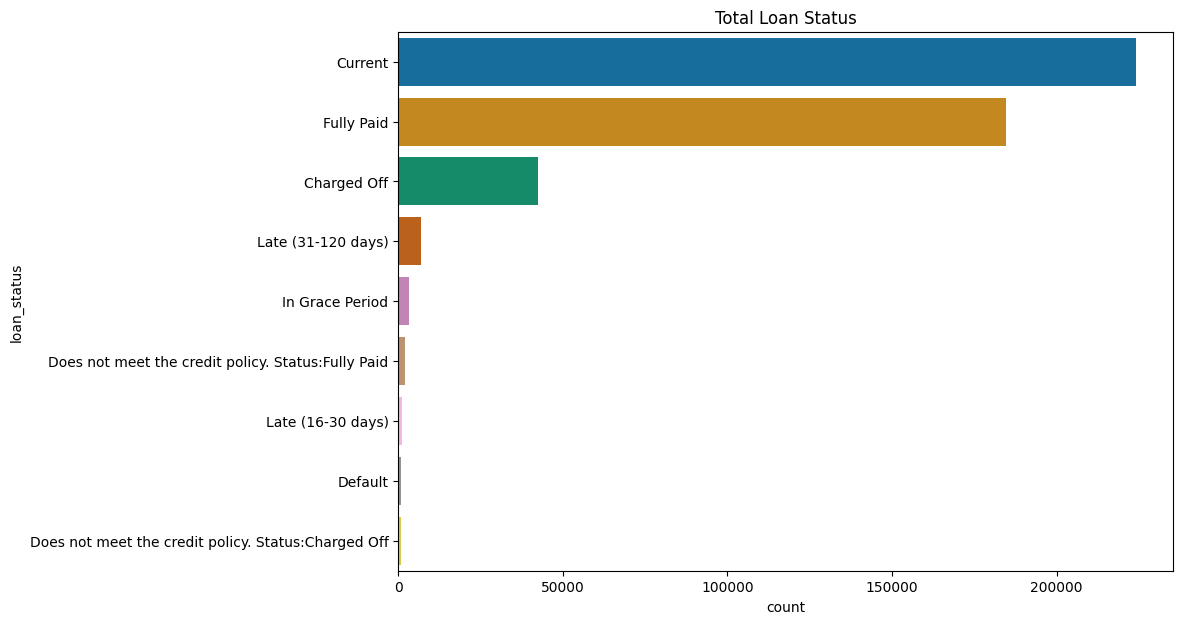

In [11]:
# Bagaimana pesebaran status peminjaman
plt.figure(figsize=(10,7))
sns.countplot(y='loan_status', data=loan_data, palette='colorblind', order=loan_data['loan_status'].value_counts(ascending=False).index)
plt.title('Total Loan Status')
plt.show()

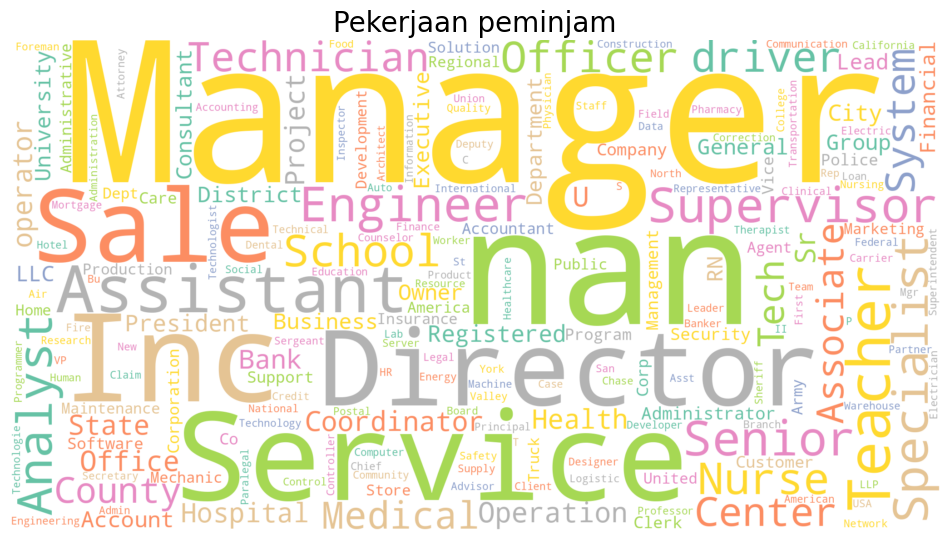

In [12]:
# Pekerjaan peminjam
title_loan = " ".join(str(tujuan) for tujuan in loan_data.emp_title)

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080, colormap='Set2').generate(title_loan)

plt.figure(figsize = (12, 13))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.title('Pekerjaan peminjam', fontsize=20)
plt.axis("off")
plt.show()

Text(0.5, 0, 'Proportion of Customers')

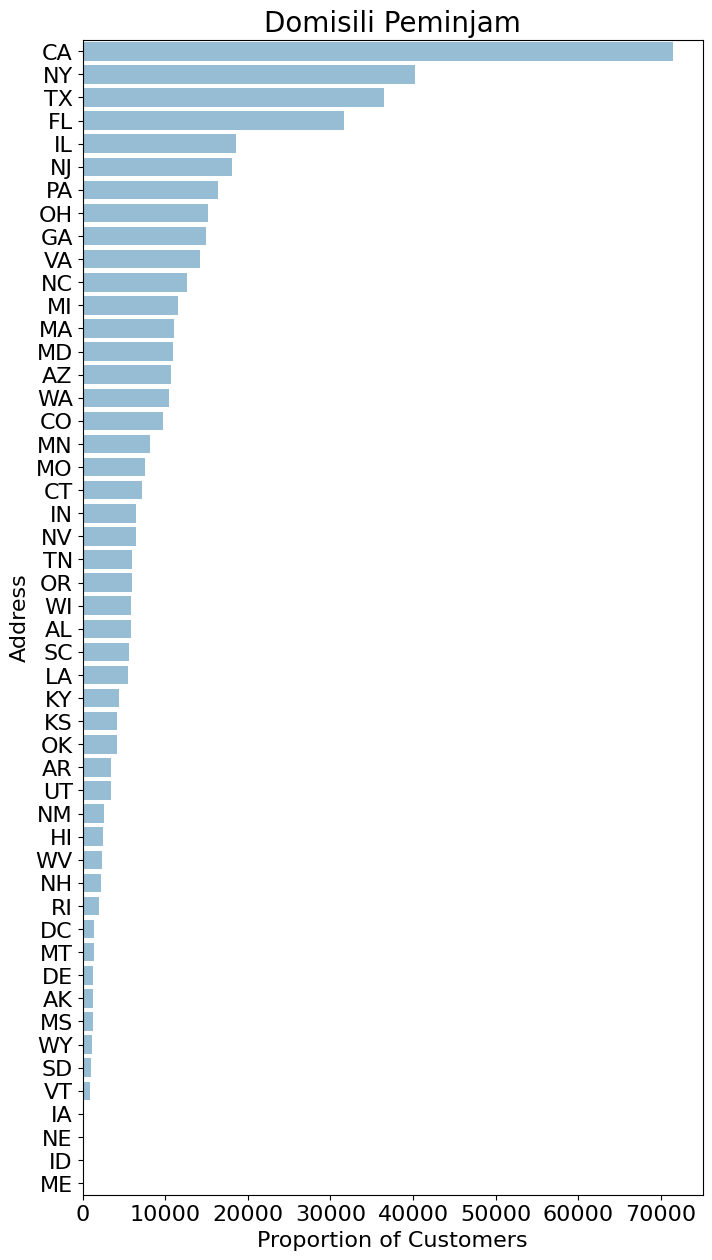

In [13]:
# Domisili Peminjam
order = loan_data['addr_state'].value_counts(ascending=False).index
plt.figure(figsize=(8,15))
ax = sns.countplot(y='addr_state', data=loan_data, orient='v', order=order, color='#8CC0DE')
plt.title('Domisili Peminjam', fontsize=20)
plt.yticks(size=16)
plt.xticks(size=16)
ax.set_ylabel("Address",fontsize=16)
ax.set_xlabel("Proportion of Customers",fontsize=16)

Text(0.5, 0, 'Jumlah Peminjam')

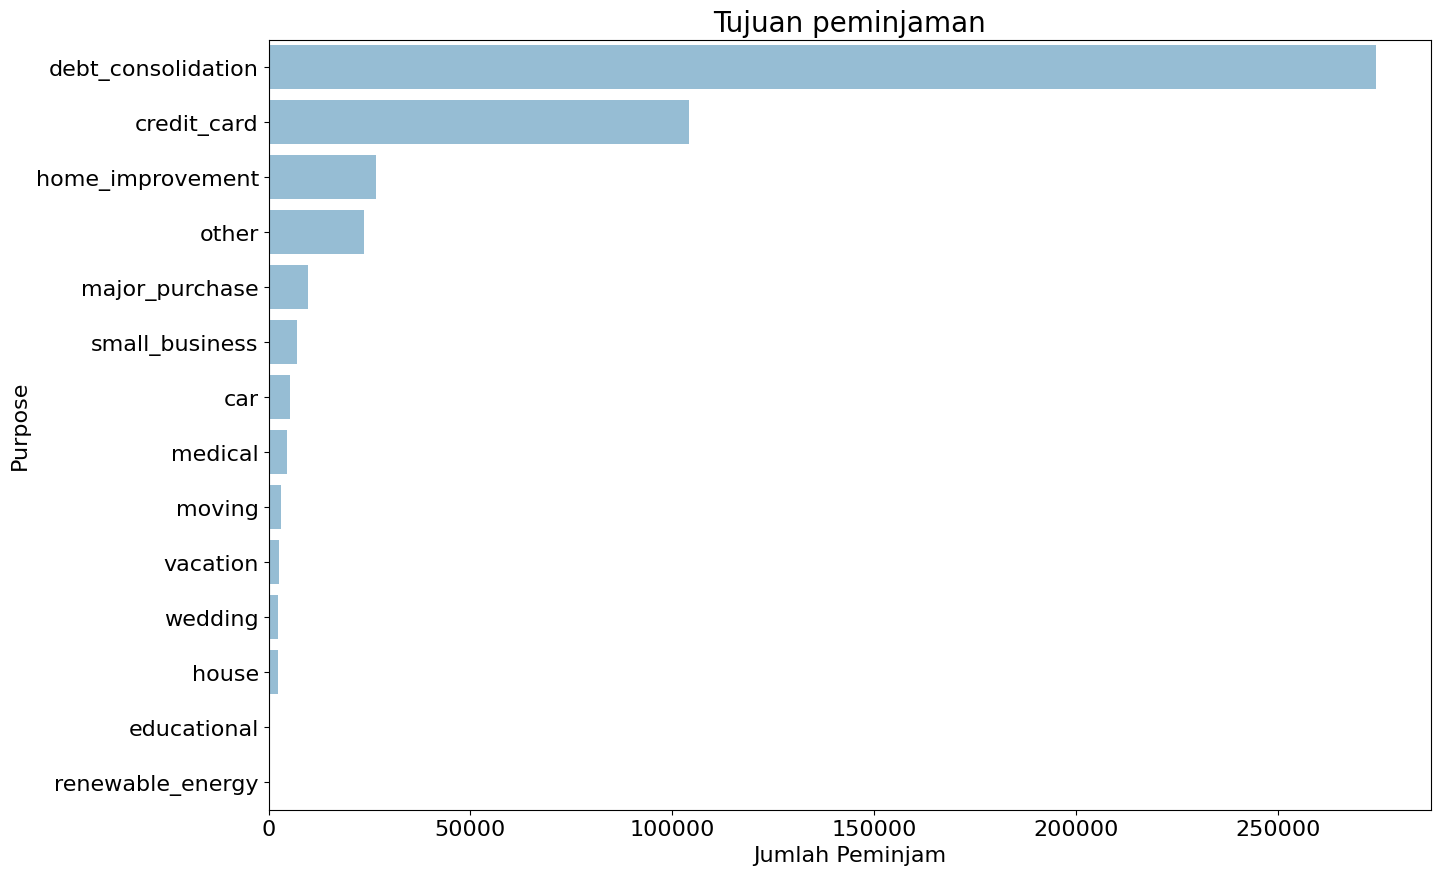

In [14]:
order = loan_data['purpose'].value_counts(ascending=False).index
plt.figure(figsize=(15,10))
ax = sns.countplot(y='purpose', data=loan_data, orient='v', order=order, color='#8CC0DE')
plt.title('Tujuan peminjaman', fontsize=20)
plt.yticks(size=16)
plt.xticks(size=16)
ax.set_ylabel("Purpose",fontsize=16)
ax.set_xlabel("Jumlah Peminjam",fontsize=16)

## **Target Variabel**

Pada project credit risk prediction, tujuan utama pembuatan model adalah untuk memprediksi kemampuan seorang peminjam dalam melakukan pembayaran terhadap pinjaman yang diberikan. Oleh karena itu target variabel yang digunakan adalah '**loan status**' yang merupakan kolom dengan isi status/performa peminjaman yang dilakukan oleh peminjam.

In [15]:
loan_data['loan_status'].isnull().sum()

0

Karena tidak terdapat data yang kosong, maka saya akan langsung mengkategorikan status variabel loan status menjadi good dan bad label

In [16]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

'loan_status' memiliki beberapa nilai, yaitu:
- Current : pembayaran lancar
- Fully Paid : pembayaran lunas
- Charged Off : pembayaran macet
- Late : pembayaran telat dilakukan
- In Grace Period : pada masa tenggang
- Default : pembayaran macet

Pengkategorian label saya buat seperti berikut, yakni:

**- Good Loan** : 'Fully Paid', 'Current', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid'.

**- Bad Loan** : 'Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off'.

In [17]:
print(loan_data['loan_status'].value_counts())
print('-'*52)
print('Persentage loan_status each unique data :\n ', round( (loan_data['loan_status'].value_counts()/len(loan_data))*100, 2) )


Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64
----------------------------------------------------
Persentage loan_status each unique data :
  Current                                                48.09
Fully Paid                                             39.62
Charged Off                                             9.11
Late (31-120 days)                                      1.48
In Grace Period                                         0.67
Does not

In [19]:
# membuat column good bad untuk kategori terima atau tolak
loan_data['loan_status'] = np.where(loan_data.loc[:, 'loan_status'].isin(['Charged Off','Default',
                                                                       'Late (31-120 days)', 'Late (16-30 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off' ])
                                , 1 , 0)
loan_data.loan_status.value_counts()

0    414099
1     52186
Name: loan_status, dtype: int64

Dari semua data setelah diklasifikasikan terdapat 414099 yang merupakan good loan sedangkan 52186 merupakan bad loan. Hal ini dapat menyebabkan masalah pada saat pembuatan model karena adanya imbalanced data.

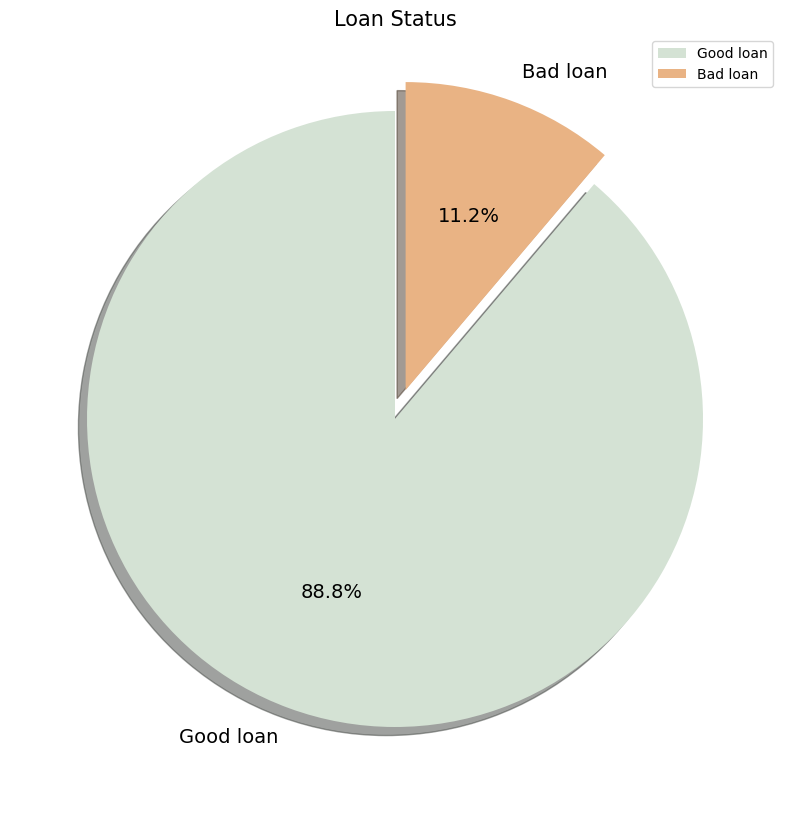

In [20]:
counts = loan_data['loan_status'].value_counts()
labels = ['Good loan', 'Bad loan']
color =['#D4E2D4', '#E9B384']
my_explode = (0, 0.1)

plt.figure(figsize=(12,10))
plt.pie(counts, labels=labels, colors=color, autopct='%1.1f%%',shadow=True, startangle=90, explode=my_explode, textprops={'fontsize': 14})
plt.title('Loan Status', fontsize=15)
plt.legend()
plt.show()

In [21]:
loan_data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **6. Data Preparation**

Pada tahap ini akan dilakukan data cleansing untuk data-data yang belum bersih

### Handling Missing Value

In [22]:
# checking jumlah missing value
loan_data.isnull().sum().sort_values(ascending=False)

inq_last_12m                 466285
open_rv_12m                  466285
open_acc_6m                  466285
verification_status_joint    466285
open_il_6m                   466285
                              ...  
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
total_pymnt                       0
Length: 72, dtype: int64

In [23]:
# checking banyaknya column/field yang tidak memiliki nilai sama sekali
full_null = [col for col in loan_data.columns
             if loan_data[col].isnull().all()]
print(full_null)
print("Banyaknya column data yang bernilai null semua = " ,len(full_null), "columns")

['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
Banyaknya column data yang bernilai null semua =  17 columns


Karena dalam dataset terdapat banyak kolom yang tidak mempunyai data sama sekali maka semua kolom tersebut tidak dapat digunakan sehingga akan saya hapus semua.

In [24]:
#drop kolom yang full null
loan_data = loan_data.drop(columns=full_null, axis=1)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_title                    438697 non-null  object 
 9   emp_length                   445277 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  verification_status          466285 non-null  object 
 13 

Sekarang data kolom yang tidak memiliki data sama sekali sudah terhapus. Selanjutnya saya akan mengecek missing value yang mempunyai persentase yang besar untuk ditindaklanjuti

In [25]:
# checking persentages of missing value dari data yang tersisa
percent_missing = loan_data.isnull().sum() * 100 / len(loan_data)
dtypes=[loan_data[col].dtype for col in loan_data.columns]


missing_value_df = pd.DataFrame({'data_type':dtypes,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df[missing_value_df['percent_missing'] > 0.00]

,data_type,percent_missing
mths_since_last_record,float64,86.566585
mths_since_last_major_derog,float64,78.773926
desc,object,72.981546
mths_since_last_delinq,float64,53.690554
next_pymnt_d,object,48.728567
tot_cur_bal,float64,15.071469
tot_coll_amt,float64,15.071469
total_rev_hi_lim,float64,15.071469
emp_title,object,5.916553
emp_length,object,4.505399


Terdapat 23 kolom yang masih memiliki missing value. Selanjutnya saya ingin menghapus data yang memiliki lebih dari 50% missing value.

In [26]:
# mengecek missing value more than 50%
missing_more_50 = missing_value_df[missing_value_df.loc[:, 'percent_missing'] > 50.00]

In [27]:
missing_more_50

,data_type,percent_missing
mths_since_last_record,float64,86.566585
mths_since_last_major_derog,float64,78.773926
desc,object,72.981546
mths_since_last_delinq,float64,53.690554


In [28]:
loan_data.dropna(thresh = loan_data.shape[0]*0.5, axis=1, inplace=True)

In [35]:
percent_missing = loan_data.isnull().sum() * 100 / len(loan_data)
dtypes=[loan_data[col].dtype for col in loan_data.columns]


missing_value_df = pd.DataFrame({'data_type':dtypes,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)

missing_value_df = missing_value_df[missing_value_df.loc[:, 'percent_missing'] > 50.00]

missing_value_df

,data_type,percent_missing


In [30]:
loan_data.shape

(466285, 51)

Setelah dihapus mising value yang lebih dari 50% dan yang full null masih tersisa 45 kolom. Selanjutnya saya akan menangani missing value yang kurang dari 50%

In [31]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   sub_grade                   466285 non-null  object 
 8   emp_title                   438697 non-null  object 
 9   emp_length                  445277 non-null  object 
 10  home_ownership              466285 non-null  object 
 11  annual_inc                  466281 non-null  float64
 12  verification_status         466285 non-null  object 
 13  issue_d       

In [32]:
# sisa missing value less than 50%
percent_missing = loan_data.isnull().sum() * 100 / len(loan_data)
dtypes=[loan_data[col].dtype for col in loan_data.columns]


missing_value_df = pd.DataFrame({'data_type':dtypes,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)

missing_value_df = missing_value_df[(missing_value_df['percent_missing'] < 50.00) & (missing_value_df['percent_missing'] > 0.00)]
missing_value_df

,data_type,percent_missing
next_pymnt_d,object,48.728567
total_rev_hi_lim,float64,15.071469
tot_cur_bal,float64,15.071469
tot_coll_amt,float64,15.071469
emp_title,object,5.916553
emp_length,object,4.505399
last_pymnt_d,object,0.080637
revol_util,float64,0.072917
collections_12_mths_ex_med,float64,0.031097
last_credit_pull_d,object,0.009007


Untuk menangani missing value di atas, saya akan mengisi nilai yang bertipe data numerical dengan median. Sedangkan data non numerical(categorical) akan saya isi nilainya dengan modus.

In [33]:
# Numerical columns
for col in loan_data.select_dtypes(exclude='object'):
  loan_data[col] = loan_data[col].fillna(loan_data[col].median())
loan_data.isnull().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      27588
emp_length                     21008
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                             20
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                  29
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
r

In [34]:
# Categorical columns
for col in loan_data.select_dtypes(include='object'):
  loan_data[col] = loan_data[col].fillna(loan_data[col].mode().iloc[0])
loan_data.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prnc

Sekarang semua data telah memiliki nilai(tidak ada lagi missing value).

### Handling Duplication

In [36]:
duplicate_value = loan_data.duplicated().sum()
print('Jumlah duplicated value pada dataset loan data adalah : ', duplicate_value)

Jumlah duplicated value pada dataset loan data adalah :  0


Karena tidak terdapat duplicated value pada dataset maka tidak perlu dilakukan penanganan pada data

### Handling Incorrect Format or Data Types

In [37]:
loan_data.dtypes

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                     int64
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec     

In [38]:
for col in loan_data.select_dtypes(include = 'object'):
  print(col)
  print(loan_data[col].unique())
  print()

term
[' 36 months' ' 60 months']

grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']

sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']

emp_title
['Teacher' 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']

emp_length
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']

home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

verification_status
['Verified' 'Source Verified' 'Not Verified']

issue_d
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'No

Dari data di atas, ada beberapa kolom yang menarik perhatian saya.
- Yang pertama ada kolom 'term' yang memiliki keterangan months, seharusnya term lebih baik jika bertipe data integer.
- 'emp_length' memiliki kasus yang sama dengan 'term', saya akan mengubahnya menjadi tipe data integer
- 'issue_d', 'eearliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d' masing-masing memiliki isi berupa tanggal sehingga akan lebih baik jika saya ubah menjadi datetime

In [39]:
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line',
                    'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

#### term

In [40]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [41]:
loan_data['term'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
loan_data['term']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term, Length: 466285, dtype: int64

#### emp_length

In [42]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [43]:
loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('< 1 year', str(0))
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' year', '')

<ipython-input-43-9684c54cb055>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years', '')


In [44]:
loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length'], downcast='integer')

In [45]:
loan_data['emp_length']

0         10
1          0
2         10
3         10
4          1
          ..
466280     4
466281    10
466282     7
466283     3
466284    10
Name: emp_length, Length: 466285, dtype: int8

#### convert to datetime

In [46]:
col_date = ['issue_d', 'earliest_cr_line',
            'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [47]:
def convert_to_datetime(date_string):
    return datetime.strptime(date_string, '%b-%y')

for col in col_date:
    loan_data[col] = loan_data[col].apply(convert_to_datetime)

In [48]:
loan_data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36,10.65,162.87,B,B2,Teacher,10,...,171.62,2016-02-01,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,...,119.66,2016-02-01,2013-09-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


In [49]:
loan_data[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                466285 non-null  int64         
 1   emp_length          466285 non-null  int8          
 2   issue_d             466285 non-null  datetime64[ns]
 3   earliest_cr_line    466285 non-null  datetime64[ns]
 4   last_pymnt_d        466285 non-null  datetime64[ns]
 5   next_pymnt_d        466285 non-null  datetime64[ns]
 6   last_credit_pull_d  466285 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(1), int8(1)
memory usage: 21.8 MB


- temp : lama waktu peminjaman, jatuh temponya
- emp_length : berapa lama waktu peminjam bekerja
- issue_d : kapan pinjaman dicairkan dananya
- earliest_cr_line : kapan kredit peminjam dibuka untuk pertama kali
last_pymnt_d : terakhir bayar untuk pinjaman ini
- next_pymnt_d : kapan akan membayar selanjutnya pinjaman ini
- last_credit_pull_d : kapan credit loan ini dievaluasi(dilihat storynya)

In [50]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   466285 non-null  int64         
 1   funded_amnt                 466285 non-null  int64         
 2   funded_amnt_inv             466285 non-null  float64       
 3   term                        466285 non-null  int64         
 4   int_rate                    466285 non-null  float64       
 5   installment                 466285 non-null  float64       
 6   grade                       466285 non-null  object        
 7   sub_grade                   466285 non-null  object        
 8   emp_title                   466285 non-null  object        
 9   emp_length                  466285 non-null  int8          
 10  home_ownership              466285 non-null  object        
 11  annual_inc                  466285 non-

Setelah mengubah beberapa data menjadi datetime, selanjutnya saya akan melakukan modifikasi untuk menghitung lamanya waktu berlalu sejak waktu tersebut.
Untuk melakukan ini, karena dataset merupakan dataset tahun 2007-2014, maka akan lebih relevaan jika menggunakan reference date disekitar tahun 2017.
Dalam contoh ini, reference date menggunakan tanggal 01-12-2017

In [51]:
def date_columns(df, column):
  df['mths_since_' + column] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df[column]) / np.timedelta64(1, 'M')))
  df.drop(columns = [column], inplace=True)

date_columns(loan_data, 'earliest_cr_line')
date_columns(loan_data, 'issue_d')
date_columns(loan_data, 'last_pymnt_d')
date_columns(loan_data, 'next_pymnt_d')
date_columns(loan_data, 'last_credit_pull_d')

#### earliest_cr_line

In [52]:
loan_data['mths_since_earliest_cr_line']

0         395.0
1         224.0
2         193.0
3         262.0
4         263.0
          ...  
466280    176.0
466281    246.0
466282    192.0
466283    178.0
466284    214.0
Name: mths_since_earliest_cr_line, Length: 466285, dtype: float64

In [53]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466285.000000
mean        239.480348
std          93.972277
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Dalam nilai min(terkecil) terdapat nilai negatif.

In [54]:
loan_data[loan_data['mths_since_earliest_cr_line']<0][['mths_since_earliest_cr_line']].head(3)


,mths_since_earliest_cr_line
1580,-537.0
1770,-609.0
2799,-561.0


Terdapat 3 nilai negatif dari kolom 'earliest_cr_line' dikarenakan terdapat kesalahan penulisan tahun yang sudah mencapai tahun 2060-an. Padahal seharusnya yang lebih masuk akal tahun 1960-an.

Untuk mengatasi hal ini, saya akan mengubah nilai yang negatif menjadi nilai maximum pada fitur 'mth_earliest_cr_line'

In [55]:
loan_data.loc[loan_data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = loan_data['mths_since_earliest_cr_line'].max()


In [56]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466285.000000
mean        242.383111
std          86.458098
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

#### issue_d

In [57]:
loan_data['mths_since_issue_d']

0         72.0
1         72.0
2         72.0
3         72.0
4         72.0
          ... 
466280    47.0
466281    47.0
466282    47.0
466283    47.0
466284    47.0
Name: mths_since_issue_d, Length: 466285, dtype: float64

In [58]:
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

#### last_pymnt_d

In [59]:
loan_data['mths_since_last_pymnt_d']

0         35.0
1         56.0
2         42.0
3         35.0
4         23.0
          ... 
466280    23.0
466281    36.0
466282    23.0
466283    36.0
466284    23.0
Name: mths_since_last_pymnt_d, Length: 466285, dtype: float64

In [60]:
loan_data['mths_since_last_pymnt_d'].describe()

count    466285.000000
mean         31.287680
std          12.806897
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

#### next_pymnt_d

In [61]:
loan_data['mths_since_next_pymnt_d']

0         22.0
1         22.0
2         22.0
3         22.0
4         22.0
          ... 
466280    22.0
466281    22.0
466282    22.0
466283    22.0
466284    22.0
Name: mths_since_next_pymnt_d, Length: 466285, dtype: float64

In [62]:
loan_data['mths_since_next_pymnt_d'].describe()

count    466285.000000
mean         22.378453
std           4.370769
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

#### last_credit_pull_d

In [63]:
loan_data['mths_since_last_credit_pull_d']

0         23.0
1         51.0
2         23.0
3         35.0
4         23.0
          ... 
466280    23.0
466281    23.0
466282    24.0
466283    32.0
466284    23.0
Name: mths_since_last_credit_pull_d, Length: 466285, dtype: float64

In [64]:
loan_data['mths_since_last_credit_pull_d'].describe()

count    466285.000000
mean         27.045223
std           9.636066
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

# **7. Exploratory Data Analysis**


### Corelation map

<ipython-input-65-2e2f08e9f079>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_data.corr(), cmap='viridis', annot=True, linewidths=.5, fmt= '.1f',ax=ax)


<Axes: >

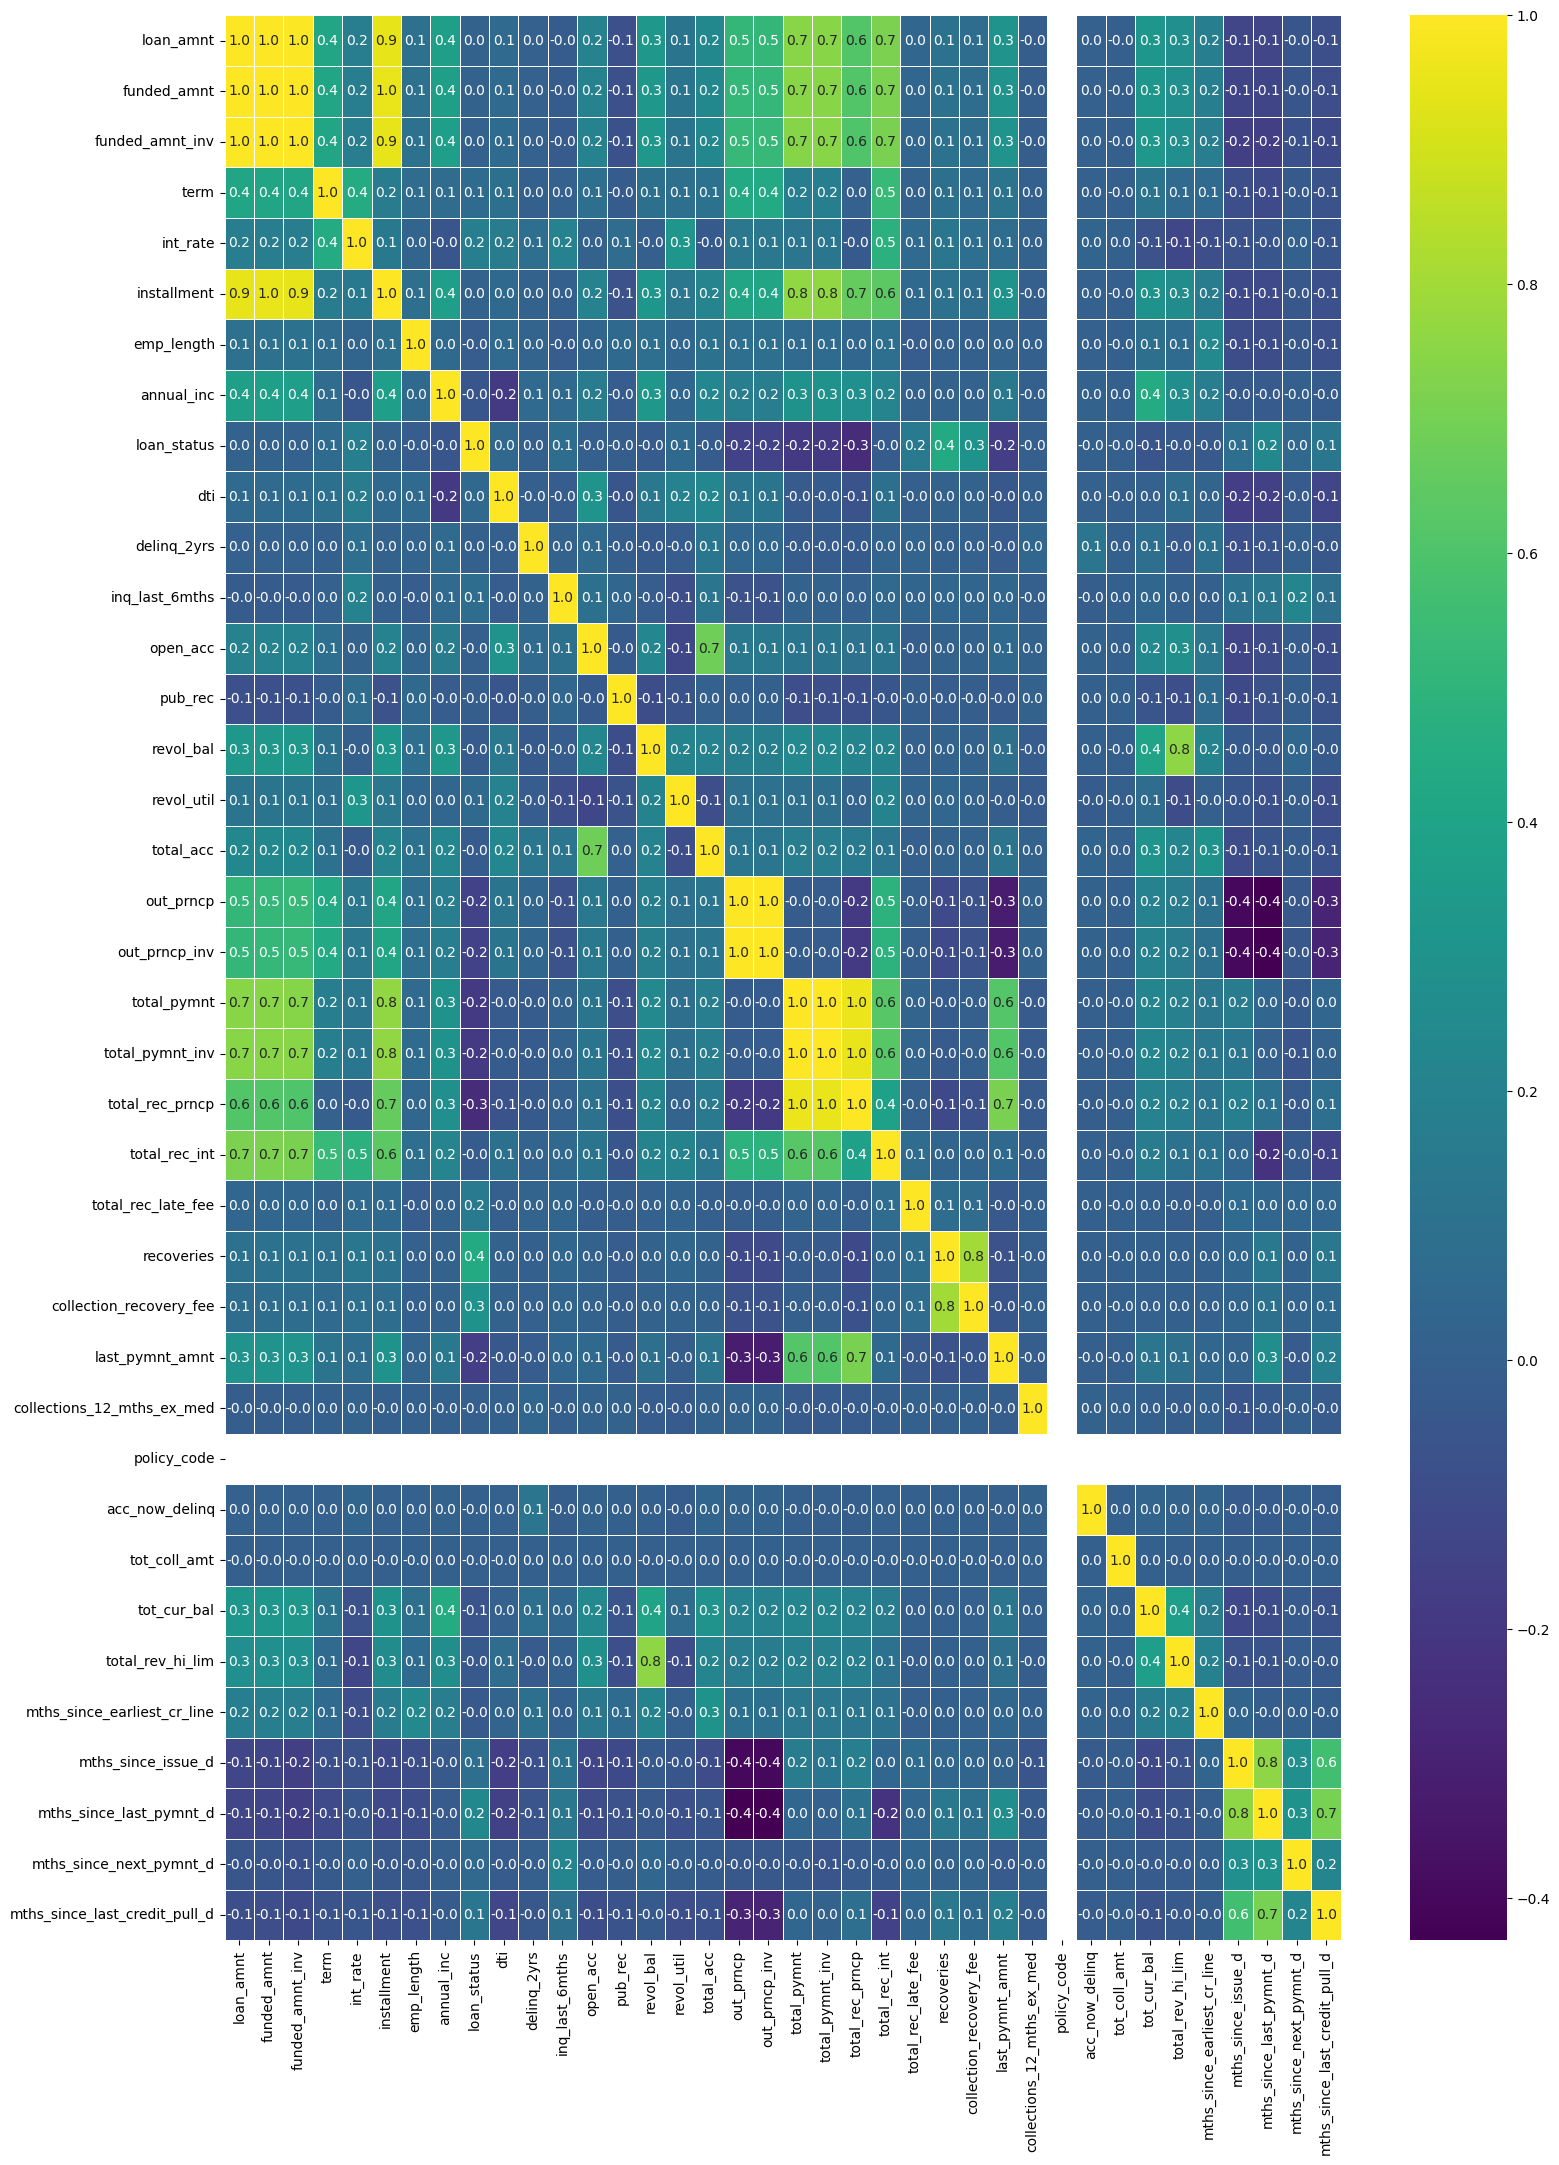

In [65]:
#correlation map
f,ax = plt.subplots(figsize=(18, 25))
sns.heatmap(loan_data.corr(), cmap='viridis', annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Seperti yang terlihat. Fitur 'policy_code' tidak memiliki korelasi sama sekali dengan fitur yang lain. Oleh sebab itu, fitur ini akan dihapus.

Kemudian bisa kita lihat dari hasil korelasi antar variabel di atas terdapat beberapa variabel yang memiliki korelasi yang tinggi. Dalam data preprocessing, jika ada dua fitur yang memiliki korelasi tinggi (biasanya di atas 0.7), maka hanya salah satu fitur yang akan dipertahankan untuk menghindari masalah multikolinieritas.




In [66]:
loan_data.drop(['policy_code'], inplace=True, axis=1)

In [67]:
corr_matrix = loan_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
hicor_fitur = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-67-07daa4de08a8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = loan_data.corr().abs()
<ipython-input-67-07daa4de08a8>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [68]:
hicor_fitur

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_last_credit_pull_d']

In [69]:
loan_data.drop(hicor_fitur, inplace=True, axis = 1)

In [70]:
loan_data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_late_fee,recoveries,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_next_pymnt_d
0,5000,36,10.65,B,B2,Teacher,10,RENT,24000.0,Verified,...,0.00,0.00,0.0,INDIVIDUAL,0.0,0.0,81539.0,395.0,72.0,22.0
1,2500,60,15.27,C,C4,Ryder,0,RENT,30000.0,Source Verified,...,0.00,117.08,0.0,INDIVIDUAL,0.0,0.0,81539.0,224.0,72.0,22.0
2,2400,36,15.96,C,C5,Teacher,10,RENT,12252.0,Not Verified,...,0.00,0.00,0.0,INDIVIDUAL,0.0,0.0,81539.0,193.0,72.0,22.0
3,10000,36,13.49,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,...,16.97,0.00,0.0,INDIVIDUAL,0.0,0.0,81539.0,262.0,72.0,22.0
4,3000,60,12.69,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,...,0.00,0.00,0.0,INDIVIDUAL,0.0,0.0,81539.0,263.0,72.0,22.0


### Check Dtypes Each Features

In [71]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  int64  
 2   int_rate                     466285 non-null  float64
 3   grade                        466285 non-null  object 
 4   sub_grade                    466285 non-null  object 
 5   emp_title                    466285 non-null  object 
 6   emp_length                   466285 non-null  int8   
 7   home_ownership               466285 non-null  object 
 8   annual_inc                   466285 non-null  float64
 9   verification_status          466285 non-null  object 
 10  loan_status                  466285 non-null  int64  
 11  pymnt_plan                   466285 non-null  object 
 12  url                          466285 non-null  object 
 13 

In [72]:
loan_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

grade                       7
sub_grade                  35
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
url                    466285
purpose                    14
title                   63099
zip_code                  888
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

Berdasarkan informasi di ats, kita perlu menghapus kolom:
- 'url', 'emp_title', 'desc', dan 'title' karena memiliki kardinalitas(nilai unique) yang banyak.
- 'application_type' karena hanya memiliki 1 angka unik, sehingga tidak dibutuhkan.
- 'zip_code' karena berisi teks bebas dan banyak kardinalitas juga.
- 'sub_grade' karena merupakan keturunan dari 'grade' sehingga sudah diwakilkan.
- 'addr_state' juga tidak dibutuhkan dalam pemodelan karena hanya menunjukan alamat peminjam

In [73]:
loan_data.drop(['sub_grade','url','emp_title', 'title', 'zip_code', 'application_type', 'addr_state'], inplace=True, axis=1 )

In [74]:
loan_data.select_dtypes(exclude='object').apply(pd.Series.nunique, axis = 0)


loan_amnt                        1352
term                                2
int_rate                          506
emp_length                         11
annual_inc                      31901
loan_status                         2
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
mths_since_next_pymnt_d           100
dtype: int64

In [75]:
for col in loan_data.select_dtypes(include='object').columns.tolist():
  print(loan_data[col].value_counts(normalize=True)*100)
  print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


f    64.982789
w    

Pada fitur 'pymnt_plan' salah satu persebaran nilai sangat mendominasi sehingga fitur ini akan dihapus

In [76]:
loan_data.drop(['pymnt_plan'], inplace=True, axis=1 )

In [77]:
loan_data.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_next_pymnt_d
0,5000,36,10.65,B,10,RENT,24000.0,Verified,0,credit_card,...,0.0,0.00,0.00,0.0,0.0,0.0,81539.0,395.0,72.0,22.0
1,2500,60,15.27,C,0,RENT,30000.0,Source Verified,1,car,...,0.0,0.00,117.08,0.0,0.0,0.0,81539.0,224.0,72.0,22.0
2,2400,36,15.96,C,10,RENT,12252.0,Not Verified,0,small_business,...,0.0,0.00,0.00,0.0,0.0,0.0,81539.0,193.0,72.0,22.0
3,10000,36,13.49,C,10,RENT,49200.0,Source Verified,0,other,...,0.0,16.97,0.00,0.0,0.0,0.0,81539.0,262.0,72.0,22.0
4,3000,60,12.69,B,1,RENT,80000.0,Source Verified,0,other,...,766.9,0.00,0.00,0.0,0.0,0.0,81539.0,263.0,72.0,22.0


### Feature Encode (One Hot Encoding)

In [78]:
categorical_cols = [col for col in loan_data.select_dtypes(include='object').columns.tolist()]

In [79]:
dataenc = pd.get_dummies(loan_data[categorical_cols], drop_first=True)

In [80]:
dataenc.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Standardization with StandardScaler

In [81]:
numerical_cols = [col for col in loan_data.columns.tolist() if col not in categorical_cols + ['loan_status']]

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(loan_data[numerical_cols]), columns=numerical_cols)

In [83]:
scaled_data.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_next_pymnt_d
0,-1.124392,-0.616225,-0.729587,1.050991,-0.896549,1.328632,-0.357012,0.178920,-1.641544,-0.31429,...,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,1.765214,1.446626,-0.086587
1,-1.426088,1.622784,0.330634,-1.695869,-0.787386,-2.065791,-0.357012,3.843328,-1.641544,-0.31429,...,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.343273,-0.212625,1.446626,-0.086587
2,-1.438156,-0.616225,0.488979,1.050991,-1.110292,-1.082491,-0.357012,1.095022,-1.842050,-0.31429,...,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,-0.571180,1.446626,-0.086587
3,-0.521001,-0.616225,-0.077850,1.050991,-0.438061,0.354248,-0.357012,0.178920,-0.238000,-0.31429,...,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,0.226895,1.446626,-0.086587
4,-1.365749,1.622784,-0.261438,-1.421183,0.122313,0.091865,-0.357012,-0.737182,0.764532,-0.31429,...,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,0.238461,1.446626,-0.086587


In [84]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  int64  
 2   int_rate                     466285 non-null  float64
 3   grade                        466285 non-null  object 
 4   emp_length                   466285 non-null  int8   
 5   home_ownership               466285 non-null  object 
 6   annual_inc                   466285 non-null  float64
 7   verification_status          466285 non-null  object 
 8   loan_status                  466285 non-null  int64  
 9   purpose                      466285 non-null  object 
 10  dti                          466285 non-null  float64
 11  delinq_2yrs                  466285 non-null  float64
 12  inq_last_6mths               466285 non-null  float64
 13 

### Transform Data

In [85]:
data = pd.concat([dataenc, scaled_data, loan_data[['loan_status']]], axis=1)

# **8. Model Building**

## Data Splitting

In [86]:
data.shape

(466285, 51)

In [87]:
# Predictor dan target
X = data.drop('loan_status', axis = 1)
y = data['loan_status']

# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', X_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Persentase loan status di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', X_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Persentase loan status di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (373028, 50) , sedangkan Jumlah baris dan kolom dari y_train adalah: (373028,)
Persentase loan status di data Training adalah:
0    0.888054
1    0.111946
Name: loan_status, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (93257, 50) , sedangkan Jumlah baris dan kolom dari y_test adalah: (93257,)
Persentase loan status di data Testing adalah:
0    0.888191
1    0.111809
Name: loan_status, dtype: float64


## Model Development

### Logistic Regression

In [88]:
# Menggunakan model yang sudah melalui resampling(smote) dan scaling
lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)

# Prediksi pada data uji (x_test)
Y_pred = lr.predict(X_test)

# Evaluasi model
acc_lr = round(lr.score(X_train, y_train) * 100, 2)
f1_lr = f1_score(y_test, Y_pred, average='micro')
cv_lr = cross_val_score(lr, X_test, y_test, cv=3).mean()


# Cetak hasil evaluasi
print('Accuracy on Training Data: {}%'.format(acc_lr))
print('F1 Score on Test Data: {}'.format(f1_lr))
print('Cross-validated Accuracy on Test Data: {}'.format(cv_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy on Training Data: 93.68%
F1 Score on Test Data: 0.9370771094931212
Cross-validated Accuracy on Test Data: 0.9359940762591599


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Naive Bayes

In [89]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
f1_gaussian = f1_score(y_test, Y_pred, average='micro')
cv_gaussian = cross_val_score(gaussian, X_test, y_test, cv=3).mean()
acc_gaussian
print('Accuracy on Training Data: {}%'.format(acc_gaussian))
print('F1 Score on Test Data: {}'.format(f1_gaussian))
print('Cross-validated Accuracy on Test Data: {}'.format(cv_gaussian))

Accuracy on Training Data: 90.62%
F1 Score on Test Data: 0.9056585564622495
Cross-validated Accuracy on Test Data: 0.9090578019900639


### Random Forest

In [90]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, max_depth=4)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
f1_random_forest = f1_score(y_test, Y_pred, average='micro')
cv_random_forest = cross_val_score(random_forest, X_test, y_test, cv=3).mean()

print('Accuracy on Training Data: {}%'.format(acc_random_forest))
print('F1 Score on Test Data: {}'.format(f1_random_forest))
print('Cross-validated Accuracy on Test Data: {}'.format(cv_random_forest))


Accuracy on Training Data: 94.03%
F1 Score on Test Data: 0.9403798106308373
Cross-validated Accuracy on Test Data: 0.9368197840845779


# Model Evaluation

In [91]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest',
              'Naive Bayes'],
    'Score': [acc_lr,acc_random_forest, acc_gaussian],
    'f1': [f1_lr, f1_random_forest, f1_gaussian],
    'cv': [cv_lr, cv_random_forest, cv_gaussian]})
evaluation = models.sort_values(by=['Score','f1','cv'], ascending=False)

In [92]:
evaluation

,Model,Score,f1,cv
1,Random Forest,94.03,0.940380,0.936820
0,Logistic Regression,93.68,0.937077,0.935994
2,Naive Bayes,90.62,0.905659,0.909058


Dari data di atas, dapat disimpulkan bahwa model algoritma Random Forest memiliki akurasi tertinggi pada train data, nilai f-1 score dan cross validation yang lebih tinggi dibandingkan dengan model Logistic Regression dan Naive Bayes.

In [93]:
y_pred_proba = random_forest.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

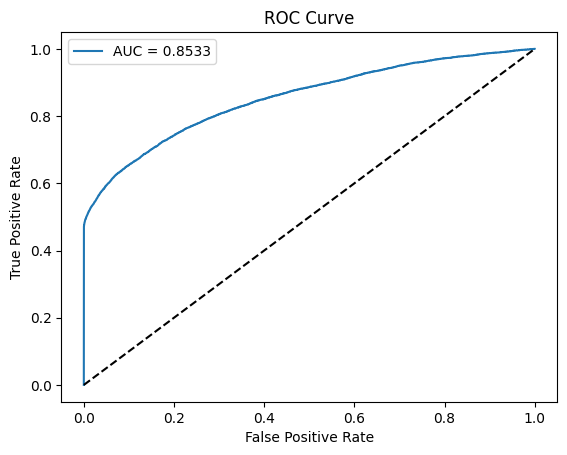

In [94]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

Setelah dilakukan model validation untuk memprediksi ROC curve didapatkan hasil AUC sebesar 0.8533 yang menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan antara kelas positif(Bad Loaner) dan negatif(God Loaner)

#Feature Importance

In [98]:
arr_feature_importances = random_forest.feature_importances_
arr_feature_names = X_train.columns.values

df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
42,recoveries,6.951168e-01
40,out_prncp,1.239161e-01
41,total_rec_late_fee,6.500567e-02
29,int_rate,4.433577e-02
3,grade_E,1.151775e-02
48,mths_since_issue_d,1.078720e-02
4,grade_F,7.506390e-03
28,term,6.842914e-03
31,annual_inc,5.548261e-03
2,grade_D,4.804596e-03


Jadi untuk fitur-fitur penting dengan menggunakan algoritma random forest pada model yang dibuat, 3 fitur penting yang utama adalah 'recoveries', 'out_prncp' dan 'total_rec_late_fee'

# **SUMMARY**

Hasil akurasi dari setiap model yang dibangun, yakni:
- Random Forest dengan akurasi 94,03%
- Logistic Regression dengan akurasi 93,68%
- Naive Bayes dengan akurasi dengan akurausi 90,62%

Jadi model yang terbaik untuk melakukan prediksi credit loan adalah menggunakan Random Forest.

Hasil dari model ini dapat digunakan untuk membantu perusahaan dalam menganalisis risiko kredit sehingga membuat keputusan bisnis menjadi lebih tepat.